# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | British Airways World Trav...
1,✅ Trip Verified | BA is barely a step above ...
2,Not Verified | Happy with the flight crew. Ha...
3,✅ Trip Verified | Horrible service from boar...
4,Not Verified | My wife and I are very disappo...


In [4]:
#save the data as csv file
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## Check the first 5 rows

In [5]:
df = pd.read_csv("data/BA_reviews.csv")
df.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | British Airways World Trav...
1,1,✅ Trip Verified | BA is barely a step above ...
2,2,Not Verified | Happy with the flight crew. Ha...
3,3,✅ Trip Verified | Horrible service from boar...
4,4,Not Verified | My wife and I are very disappo...


## Drop the first column

In [6]:
df = df.drop(columns = "Unnamed: 0")
df.head()

,reviews
0,✅ Trip Verified | British Airways World Trav...
1,✅ Trip Verified | BA is barely a step above ...
2,Not Verified | Happy with the flight crew. Ha...
3,✅ Trip Verified | Horrible service from boar...
4,Not Verified | My wife and I are very disappo...


## Check the last 5 rows

In [7]:
df.tail()

,reviews
995,✅ Trip Verified | Lisbon to London. Business ...
996,✅ Trip Verified | Heathrow to Marseille. Withi...
997,✅ Trip Verified | Madrid to London with Britis...
998,✅ Trip Verified | Gatwick to Glasgow. Awful e...
999,✅ Trip Verified | Frankfurt to London. BA sta...


## Check the number of rows and columns in the dataset

In [8]:
df.shape

(1000, 1)

## Basic summary statistics

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [10]:
df.describe()

,reviews
count,1000
unique,1000
top,✅ Trip Verified | British Airways World Trav...
freq,1


## Check number of missing values

In [11]:
df.isnull().sum()

reviews    0
dtype: int64

## Check for duplicates

In [12]:
df.duplicated().sum()

0

## Check unique values

In [13]:
df['reviews'].nunique()

1000

# Data Cleaning

In [14]:
import re

# Function to clean each review
def clean_review(review):
    # Remove verification symbols and labels
    cleaned = re.sub(r'✅|❎|Trip Verified|Not Verified|\s*\|\s*', ' ', review)
    # Remove any extra spaces
    cleaned = re.sub(r'\s+', ' ', cleaned).strip()
    return cleaned

df['cleaned_reviews'] = df['reviews'].apply(clean_review)
df[['reviews', 'cleaned_reviews']]


,reviews,cleaned_reviews
0,✅ Trip Verified | British Airways World Trav...,British Airways World Traveller Plus (Premium ...
1,✅ Trip Verified | BA is barely a step above ...,BA is barely a step above low cost airlines. T...
2,Not Verified | Happy with the flight crew. Ha...,Happy with the flight crew. Hadn't been on a p...
3,✅ Trip Verified | Horrible service from boar...,Horrible service from boarding to landing. I f...
4,Not Verified | My wife and I are very disappo...,My wife and I are very disappointed with flyin...
...,...,...
995,✅ Trip Verified | Lisbon to London. Business ...,Lisbon to London. Business class is just econo...
996,✅ Trip Verified | Heathrow to Marseille. Withi...,Heathrow to Marseille. Within a few days of bo...
997,✅ Trip Verified | Madrid to London with Britis...,Madrid to London with British Airways. There i...
998,✅ Trip Verified | Gatwick to Glasgow. Awful e...,Gatwick to Glasgow. Awful experience. Our flig...


## Lowercase the text

In [15]:
df['cleaned_reviews'] = df['cleaned_reviews'].str.lower()

## Remove punctuations

In [16]:
df['cleaned_reviews'] = df['cleaned_reviews'].str.replace(r'[^\w\s]', '', regex=True)


## Remove stopwords

In [17]:
from nltk.corpus import stopwords

# Make sure you have NLTK stopwords downloaded
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
df['cleaned_reviews'] = df['cleaned_reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
df.head()

,reviews,cleaned_reviews
0,✅ Trip Verified | British Airways World Trav...,british airways world traveller plus premium e...
1,✅ Trip Verified | BA is barely a step above ...,ba barely step low cost airlines try dime nick...
2,Not Verified | Happy with the flight crew. Ha...,happy flight crew hadnt plane 20 years stresse...
3,✅ Trip Verified | Horrible service from boar...,horrible service boarding landing flew london ...
4,Not Verified | My wife and I are very disappo...,wife disappointed flying british airways fligh...


## Tokenization

In [19]:
df['Tokenized_reviews'] = df['cleaned_reviews'].str.split()

In [20]:
df.head()

,reviews,cleaned_reviews,Tokenized_reviews
0,✅ Trip Verified | British Airways World Trav...,british airways world traveller plus premium e...,"[british, airways, world, traveller, plus, pre..."
1,✅ Trip Verified | BA is barely a step above ...,ba barely step low cost airlines try dime nick...,"[ba, barely, step, low, cost, airlines, try, d..."
2,Not Verified | Happy with the flight crew. Ha...,happy flight crew hadnt plane 20 years stresse...,"[happy, flight, crew, hadnt, plane, 20, years,..."
3,✅ Trip Verified | Horrible service from boar...,horrible service boarding landing flew london ...,"[horrible, service, boarding, landing, flew, l..."
4,Not Verified | My wife and I are very disappo...,wife disappointed flying british airways fligh...,"[wife, disappointed, flying, british, airways,..."


In [21]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('averaged_perceptron_tagger')

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to get POS tag for each token
def get_wordnet_pos(token):
    tag = nltk.pos_tag([token])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Define a function to lemmatize a list of tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]

# Apply lemmatization to the tokenized_text column
df['lemmatized_text'] = df['Tokenized_reviews'].apply(lemmatize_tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [22]:
df.head()

,reviews,cleaned_reviews,Tokenized_reviews,lemmatized_text
0,✅ Trip Verified | British Airways World Trav...,british airways world traveller plus premium e...,"[british, airways, world, traveller, plus, pre...","[british, airway, world, traveller, plus, prem..."
1,✅ Trip Verified | BA is barely a step above ...,ba barely step low cost airlines try dime nick...,"[ba, barely, step, low, cost, airlines, try, d...","[ba, barely, step, low, cost, airline, try, di..."
2,Not Verified | Happy with the flight crew. Ha...,happy flight crew hadnt plane 20 years stresse...,"[happy, flight, crew, hadnt, plane, 20, years,...","[happy, flight, crew, hadnt, plane, 20, year, ..."
3,✅ Trip Verified | Horrible service from boar...,horrible service boarding landing flew london ...,"[horrible, service, boarding, landing, flew, l...","[horrible, service, boarding, land, flew, lond..."
4,Not Verified | My wife and I are very disappo...,wife disappointed flying british airways fligh...,"[wife, disappointed, flying, british, airways,...","[wife, disappointed, fly, british, airway, fli..."


In [23]:
type(df['lemmatized_text'].iloc[0])

list

# Modeling

## Topic Modeling

## First convert lemmatized column into a string column

In [24]:
df['lemmatized_text'] = df['lemmatized_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
doc_term_matrix = vectorizer.fit_transform(df['lemmatized_text'])


In [26]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(doc_term_matrix)


LatentDirichletAllocation(n_components=5, random_state=42)

In [27]:
from collections import Counter

# Assuming you have topic words stored for each review
def print_top_words_for_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Assuming 'vectorizer' is your fitted vectorizer, and 'lda_model' is your LDA topic model
n_top_words = 10
tf_feature_names = vectorizer.get_feature_names_out()
print_top_words_for_topics(lda, tf_feature_names, n_top_words)


Topic 0:
seat flight ba crew food good service cabin class time
Topic 1:
flight ba british airway get book service cancel london airline
Topic 2:
service ba customer flight british airway cancel airline travel book
Topic 3:
flight ba take staff london hour get time service airport
Topic 4:
flight ba hour get call told bag day customer time


# Performing Sentiment Analysis

## Using TextBlob

In [28]:
from textblob import TextBlob

def analyze_sentiment(text):
    blob = TextBlob(text)
    # Return polarity and subjectivity
    return blob.sentiment.polarity, blob.sentiment.subjectivity

In [29]:
df['sentiment_polarity'], df['sentiment_subjectivity'] = zip(*df['lemmatized_text'].apply(analyze_sentiment))
df

,reviews,cleaned_reviews,Tokenized_reviews,lemmatized_text,sentiment_polarity,sentiment_subjectivity
0,✅ Trip Verified | British Airways World Trav...,british airways world traveller plus premium e...,"[british, airways, world, traveller, plus, pre...",british airway world traveller plus premium ec...,0.207667,0.540667
1,✅ Trip Verified | BA is barely a step above ...,ba barely step low cost airlines try dime nick...,"[ba, barely, step, low, cost, airlines, try, d...",ba barely step low cost airline try dime nicke...,0.010000,0.340000
2,Not Verified | Happy with the flight crew. Ha...,happy flight crew hadnt plane 20 years stresse...,"[happy, flight, crew, hadnt, plane, 20, years,...",happy flight crew hadnt plane 20 year stress m...,0.300000,0.450000
3,✅ Trip Verified | Horrible service from boar...,horrible service boarding landing flew london ...,"[horrible, service, boarding, landing, flew, l...",horrible service boarding land flew london mar...,-0.583333,0.883333
4,Not Verified | My wife and I are very disappo...,wife disappointed flying british airways fligh...,"[wife, disappointed, flying, british, airways,...",wife disappointed fly british airway flight 91...,0.091667,0.525000
...,...,...,...,...,...,...
995,✅ Trip Verified | Lisbon to London. Business ...,lisbon london business class economy class emp...,"[lisbon, london, business, class, economy, cla...",lisbon london business class economy class emp...,-0.200000,0.387500
996,✅ Trip Verified | Heathrow to Marseille. Withi...,heathrow marseille within days booking flight ...,"[heathrow, marseille, within, days, booking, f...",heathrow marseille within day book flight dece...,0.025000,0.575000
997,✅ Trip Verified | Madrid to London with Britis...,madrid london british airways nothing left bus...,"[madrid, london, british, airways, nothing, le...",madrid london british airway nothing left busi...,-0.044872,0.517949
998,✅ Trip Verified | Gatwick to Glasgow. Awful e...,gatwick glasgow awful experience flight arrive...,"[gatwick, glasgow, awful, experience, flight, ...",gatwick glasgow awful experience flight arrive...,-0.218182,0.380135


In [30]:
# Display the first few entries to see the sentiment scores
print(df.head())

# You can also perform aggregate analyses like average sentiment:
average_polarity = df['sentiment_polarity'].mean()
average_subjectivity = df['sentiment_subjectivity'].mean()
print("Average Polarity: ", average_polarity)
print("Average Subjectivity: ", average_subjectivity)

                                             reviews  \
0  ✅ Trip Verified |   British Airways World Trav...   
1  ✅ Trip Verified |   BA is barely a step above ...   
2  Not Verified |  Happy with the flight crew. Ha...   
3  ✅ Trip Verified |   Horrible service from boar...   
4  Not Verified |  My wife and I are very disappo...   

                                     cleaned_reviews  \
0  british airways world traveller plus premium e...   
1  ba barely step low cost airlines try dime nick...   
2  happy flight crew hadnt plane 20 years stresse...   
3  horrible service boarding landing flew london ...   
4  wife disappointed flying british airways fligh...   

                                   Tokenized_reviews  \
0  [british, airways, world, traveller, plus, pre...   
1  [ba, barely, step, low, cost, airlines, try, d...   
2  [happy, flight, crew, hadnt, plane, 20, years,...   
3  [horrible, service, boarding, landing, flew, l...   
4  [wife, disappointed, flying, british, airwa

The small positive polarity indicates that people tend to write reviews that are not overly critical or negative, but also not highly enthusiastic.
The subjectivity score suggests that the reviews contain a mix of facts (e.g., details about flight schedules, amenities) and personal impressions (e.g., how the passengers felt about the staff, service, etc).

## Histogram showing the distribution of sentiment polarity

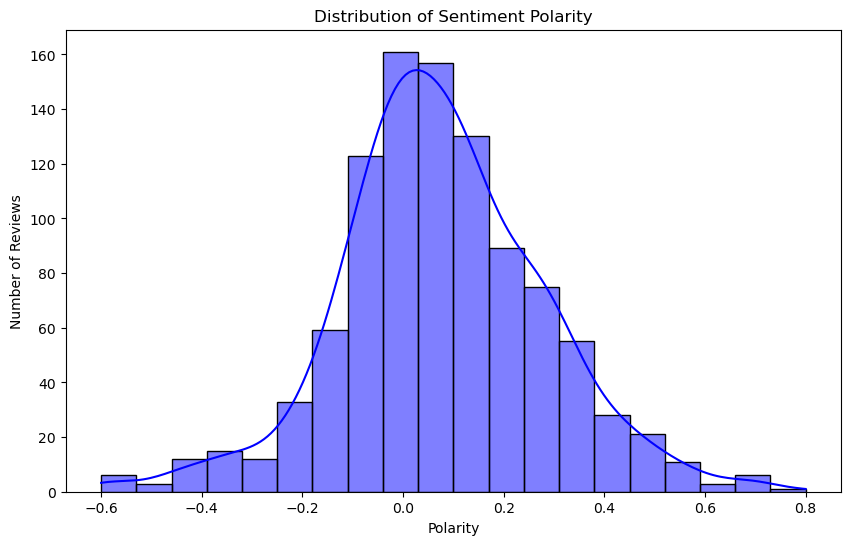

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of sentiment polarity
plt.figure(figsize=(10,6))
sns.histplot(df['sentiment_polarity'], bins=20, kde=True, color='blue')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Polarity')
plt.ylabel('Number of Reviews')
plt.show()


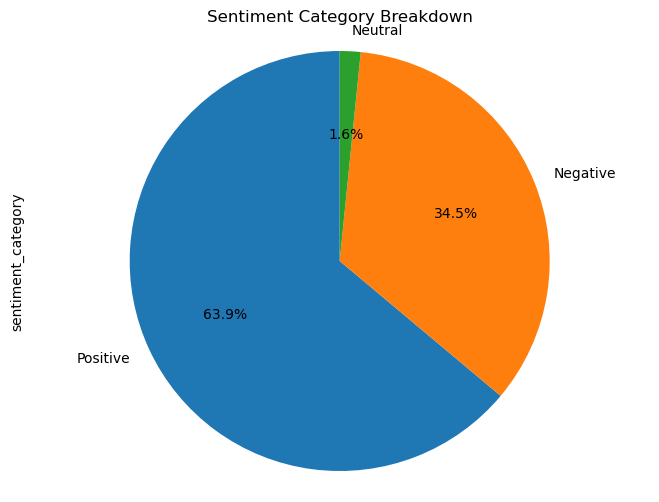

In [35]:
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'
    
# Apply sentiment categorization to the DataFrame
df['sentiment_category'] = df['sentiment_polarity'].apply(categorize_sentiment)

# Count the number of reviews in each category
sentiment_counts = df['sentiment_category'].value_counts()

# Plot sentiment breakdown as a percentage
plt.figure(figsize=(8,6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Sentiment Category Breakdown')

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')

# Show the plot
plt.show()


## Wordcloud

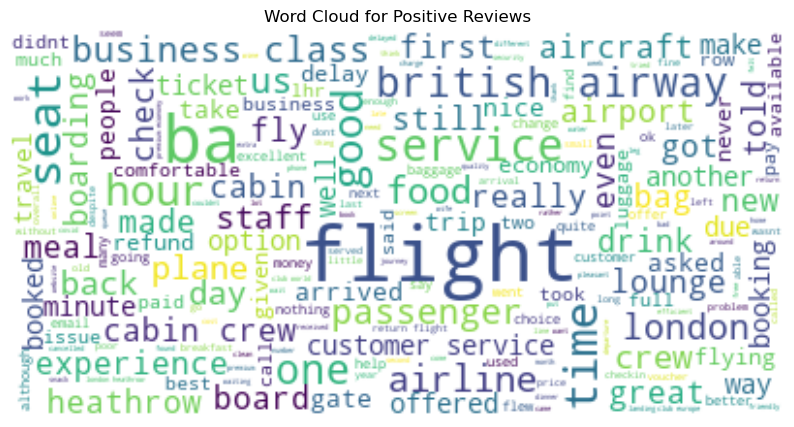

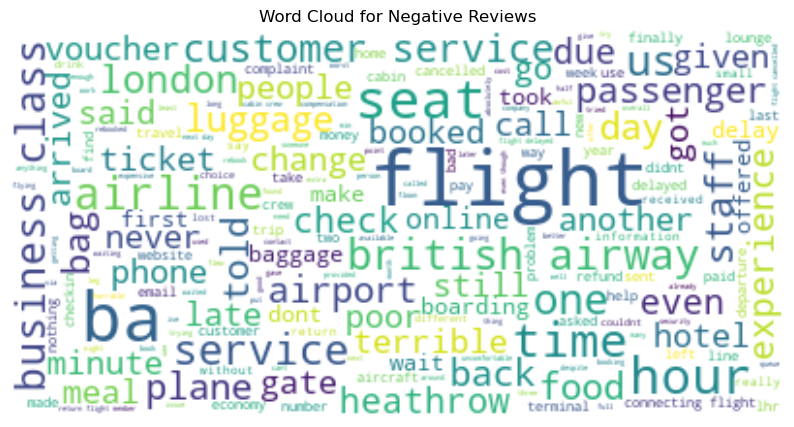

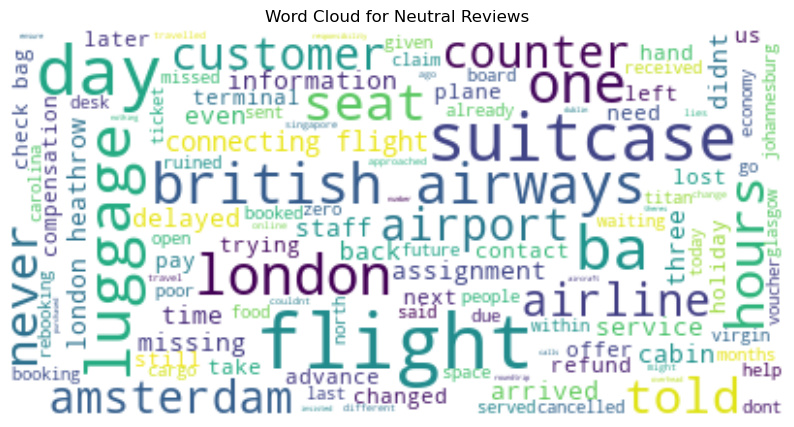

In [33]:
from wordcloud import WordCloud

# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=40).generate(' '.join(text))
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word clouds for each sentiment category
positive_reviews = df[df['sentiment_category'] == 'Positive']['cleaned_reviews']
negative_reviews = df[df['sentiment_category'] == 'Negative']['cleaned_reviews']
neutral_reviews = df[df['sentiment_category'] == 'Neutral']['cleaned_reviews']

generate_wordcloud(positive_reviews, 'Word Cloud for Positive Reviews')
generate_wordcloud(negative_reviews, 'Word Cloud for Negative Reviews')
generate_wordcloud(neutral_reviews, 'Word Cloud for Neutral Reviews')
